In [19]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier 
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

In [2]:
hr = pd.read_csv('HR Analytics.csv')

In [26]:
from sklearn import tree
with open("model.dot",'w') as f:
    f=tree.export_graphviz(model,out_file=f,feature_names=train_x.columns)
import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
def draw_tree(model,columns):
    import pydotplus
    from sklearn.externals.six import StringIO
    from IPython.display import Image
    dot_data =StringIO()
    tree.export_graphviz(model,out_file=dot_data,feature_names=columns)
    graph =pydotplus.graph_from_dot_data(dot_data.getvalue())   
    return Image(graph.create_png())

In [38]:
hr_dummies = pd.get_dummies(hr)
error_rates=[]
for i in np.random.randint(1,30,100):
    train,test =train_test_split(hr_dummies,test_size=0.3,random_state=i)
    train_x =train.drop('Attrition',axis=1)
    test_x = test.drop('Attrition',axis=1)
    train_y =train['Attrition']
    test_y=test['Attrition']
    model = DecisionTreeClassifier(max_depth=30)
    model.fit(train_x,train_y)
    test_pred = model.predict(test_x)
    error_rate = (test_pred != test_y).sum()/test_y.shape[0] * 100
    error_rates.append(error_rate)
    #print(error_rate)
    #draw_tree(model,train_x.columns)

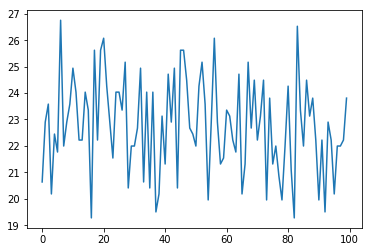

In [39]:
plt.plot(error_rates)

# Training vs Testing Error

In [48]:
train,test =train_test_split(hr_dummies,test_size=0.3,random_state=100)
train_x =train.drop('Attrition',axis=1)
test_x = test.drop('Attrition',axis=1)
train_y =train['Attrition']
test_y=test['Attrition']
depth =[]
train_errors= []
for i in range(1,15):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(train_x,train_y)
    #test_pred = model.predict(test_x)
    train_pred = model.predict(train_x)
    train_error = (train_pred != train_y).sum()/train_y.shape[0] * 100
    depth.append(i)
    train_errors.append(train_error)

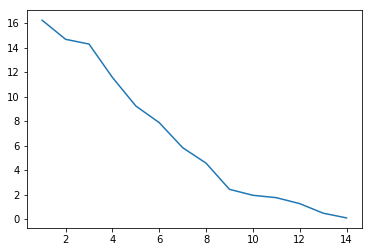

In [49]:
plt.plot(depth,train_errors)

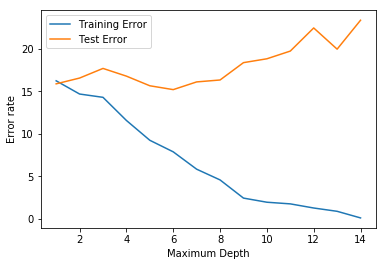

In [57]:
train,test =train_test_split(hr_dummies,test_size=0.3,random_state=100)
train_x =train.drop('Attrition',axis=1)
test_x = test.drop('Attrition',axis=1)
train_y =train['Attrition']
test_y=test['Attrition']
depth =[]
test_errors= []
train_errors= []
for i in range(1,15):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(train_x,train_y)
    test_pred = model.predict(test_x)
    train_pred = model.predict(train_x)
    train_error = (train_pred != train_y).sum()/train_y.shape[0] * 100
    test_error = (test_pred != test_y).sum()/test_y.shape[0] * 100
    depth.append(i)
    test_errors.append(test_error)
    train_errors.append(train_error)
plt.plot(depth,train_errors)
plt.plot(depth,test_errors)
plt.xlabel('Maximum Depth')
plt.ylabel('Error rate')
plt.legend(['Training Error','Test Error'])

# Hyper Parameter Tuning

In [58]:
from sklearn.model_selection import GridSearchCV

In [62]:
dt_model =DecisionTreeClassifier()
params = {'max_depth': list(range(1,11)),'criterion':['entropy','gini'],'min_samples_split':[20,2,3,4,5,6,10,20,12]}
tree_cv =GridSearchCV(dt_model,param_grid =params)
tree_cv.fit(train_x,train_y)
tree_cv.best_params_ 

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 20}